## Final Project Submission

Please fill out:
* Student name: Khalif
* Student pace: DSFT13-Remote
* Instructor name: TM William

## Aviation Accident Analysis for Business Diversification Strategy

## Objective
### This notebook analyzes the Aviation Accident (1963-2023) to extract actionable business insights for a company looking to diversify into the aviation industry. By examining accident trends, safety risks, and operational vulnerabilities, we aim to:

#### Determine the optimal aircraft type for company acquisition.

#### Identify the most favorable season for operational activities.

#### Evaluate the best overall location for operational efficiency.

#### Assess the phase of flight with the highest risk.

#### Ascertain the ideal weather conditions for safe operations.

#### Identify which aircraft types pose the greatest risk to human life.

#### Formulate actionable business recommendations based on the comprehensive analysis.

#### The insights gathered through our thorough data analysis will play a pivotal role in guiding the company towards making informed and strategic decisions. By identifying the optimal type of aircraft to invest in and developing a comprehensive low-risk strategy, the company can achieve enhanced operational efficiency and reduced risk exposure

## Main Objectives(GOALS)

### Phase 1. DATA CLEANING

#### OBJECTIVES 
#### 1.Data Cleaning: Transform the raw data into a structured and clean dataset, ensuring it's ready for analysis.
#### 2.Feature Selection: Identify and retain only the columns that provide meaningful insights while removing redundant or irrelevant data.
#### 3.Location Analysis: Determine the key location of interest for focused analysis and strategic decision-making.
#### 4.Correlation and Objective Setting: Analyze the correlations between selected columns to identify key objectives and potential areas for company expansion.
#### 5.Visualization: Create clear and insightful visualizations to effectively communicate the findings and support data-driven decisions.

In [73]:
# first we are going to import all the necessary library's necessary for data cleaning
import numpy as np
import pandas as pd

In [74]:
# load the aviationdata.csv
# were going to use encoding='ISO-8859-1' since it has special characters
aviation=pd.read_csv("./data/AviationData.csv",encoding='ISO-8859-1', low_memory=False)
#were gonna create a copy of the original data frame so as to not not corrupt it
aviation_copy=aviation.copy(deep=True)

In [75]:
#lets load a sample to see if it loaded and get a brief introduction to the data set
aviation_copy.sample(5)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
82010,20190809X00635,Accident,GAA18WA590,2018-07-27,"Canefield Airoprt, Dominican Republic",Dominican Republic,NaN,NaN,NaN,NaN,...,NaN,Express Carriers Inc,0.0,0.0,0.0,7.0,VMC,NaN,NaN,26-09-2020
62658,20070616X00747,Accident,SEA07FA148,2007-06-07,"QUILCENE, WA",United States,47.770834,-122.886666,NaN,NaN,...,Personal,NaN,2.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,31-03-2008
37067,20001207X03225,Accident,ATL95LA082,1995-04-11,"SAVANNAH, GA",United States,NaN,NaN,CAV,SAVANNAH INTERNATIONAL,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,Landing,Probable Cause,23-08-1995
64985,20080821X01282,Accident,SEA08CA165,2008-07-22,"Byron, CA",United States,374942N,1213733W,C83,BYRON,...,Personal,NaN,0.0,0.0,0.0,2.0,VMC,NaN,The pilot's failure to maintain an adequate ai...,25-09-2020
16586,20001213X35423,Accident,NYC87FAMS1,1986-12-31,"HAMBURG, NY",United States,NaN,NaN,NaN,NaN,...,Positioning,NaN,1.0,0.0,0.0,0.0,IMC,Unknown,Probable Cause,NaN


In [76]:
# now we check the number oc columns,null values and the data type
aviation_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [77]:
# we can now identify and drop columns that will not give us any meaningful insight
# the criteria i used is based on the number of null value and irrelevance to the main goal
aviation_copy.drop(columns=["Event.Id","Accident.Number","Airport.Code","Registration.Number","Publication.Date",
                       "Schedule","Amateur.Built","Number.of.Engines","Air.carrier","FAR.Description","Air.carrier",
                       "Report.Status","Injury.Severity","Airport.Name","Latitude","Longitude","Make"],inplace=True)
aviation_copy.head()

,Investigation.Type,Event.Date,Location,Country,Aircraft.damage,Aircraft.Category,Model,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight
0,Accident,1948-10-24,"MOOSE CREEK, ID",United States,Destroyed,NaN,108-3,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise
1,Accident,1962-07-19,"BRIDGEPORT, CA",United States,Destroyed,NaN,PA24-180,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown
2,Accident,1974-08-30,"Saltville, VA",United States,Destroyed,NaN,172M,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC,Cruise
3,Accident,1977-06-19,"EUREKA, CA",United States,Destroyed,NaN,112,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise
4,Accident,1979-08-02,"Canton, OH",United States,Destroyed,NaN,501,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Approach


#### Missing Value Handling
Drops rows with nulls in key columns

In [78]:
# For categorical columns:
aviation_copy['Broad.phase.of.flight'].fillna('Unknown', inplace=True)

# For numerical columns:
injury_columns = ['Total.Fatal.Injuries', 'Total.Serious.Injuries', 
                 'Total.Minor.Injuries', 'Total.Uninjured']
aviation_copy[injury_columns] = aviation_copy[injury_columns].fillna(0)

C:\Users\khali\AppData\Local\Temp\ipykernel_5420\2544814843.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [79]:
# since 91% of the data is in accidents we are going to:
# first drop the rows that contain incidents
aviation_copy = aviation_copy[aviation_copy["Investigation.Type"].str.contains("Accident",na=False)]
# we can now drop the investigation type column
aviation_copy.drop(columns=["Investigation.Type"],inplace=True)
aviation_copy.head()

,Event.Date,Location,Country,Aircraft.damage,Aircraft.Category,Model,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight
0,1948-10-24,"MOOSE CREEK, ID",United States,Destroyed,NaN,108-3,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise
1,1962-07-19,"BRIDGEPORT, CA",United States,Destroyed,NaN,PA24-180,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown
2,1974-08-30,"Saltville, VA",United States,Destroyed,NaN,172M,Reciprocating,Personal,3.0,0.0,0.0,0.0,IMC,Cruise
3,1977-06-19,"EUREKA, CA",United States,Destroyed,NaN,112,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise
4,1979-08-02,"Canton, OH",United States,Destroyed,NaN,501,NaN,Personal,1.0,2.0,0.0,0.0,VMC,Approach


In [80]:
# since this project is aimed at finding good  risk evasion strategy were going to remove all the rows that contain null values in the aircraft damage column
aviation_copy.dropna(subset=["Aircraft.damage"],inplace=True)

In [81]:
# Create severity score combining different injury types
aviation_copy['Severity_Score'] = (aviation_copy['Total.Fatal.Injuries'] * 3 + 
                                 aviation_copy['Total.Serious.Injuries'] * 2 +
                                 aviation_copy['Total.Minor.Injuries'] * 1)

# Extract state from Location for regional analysis
aviation_copy['State'] = aviation_copy['Location'].str.extract(r', ([A-Z]{2})$')

#### I have identified  USA as my country of intrest in this project

In [82]:
#we are now going to filter the data using the sting usa to get only planes in the usa
# we are gonna use na=False due to the na values
aviation_copy = aviation_copy[aviation_copy["Country"].str.contains("United States",na=False)]
# we can now drop the country column
aviation_copy.drop(columns=["Country"],inplace=True)
aviation_copy.head()

,Event.Date,Location,Aircraft.damage,Aircraft.Category,Model,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Severity_Score,State
0,1948-10-24,"MOOSE CREEK, ID",Destroyed,NaN,108-3,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,6.0,ID
1,1962-07-19,"BRIDGEPORT, CA",Destroyed,NaN,PA24-180,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,12.0,CA
2,1974-08-30,"Saltville, VA",Destroyed,NaN,172M,Reciprocating,Personal,3.0,0.0,0.0,0.0,IMC,Cruise,9.0,VA
3,1977-06-19,"EUREKA, CA",Destroyed,NaN,112,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,6.0,CA
4,1979-08-02,"Canton, OH",Destroyed,NaN,501,NaN,Personal,1.0,2.0,0.0,0.0,VMC,Approach,7.0,OH


#### season

In [83]:
#to create the seasons we have to get the months 
#lets first create the months column
aviation_time=pd.to_datetime(aviation_copy["Event.Date"])
aviation_copy["Event.Date"]=aviation_time
aviation_copy["Event.Month"]=aviation_copy["Event.Date"].dt.month


In [84]:
aviation_copy["Aircraft.Category"].unique()

array([nan, 'Airplane', 'Helicopter', 'Glider', 'Balloon', 'Gyrocraft',
       'Ultralight', 'Unknown', 'Blimp', 'Powered-Lift', 'Weight-Shift',
       'Powered Parachute', 'Rocket', 'WSFT', 'ULTR'], dtype=object)

In [85]:
# now lets group the months to season
# Define the function to map months to seasons 
def get_season(month):
     if month in [12, 1, 2]:
         return "Winter" 
     elif month in [3, 4, 5]:
         return "Spring"
     elif month in [6, 7, 8]:
         return "Summer"
     elif month in [9, 10, 11]:
         return "Autumn" 
aviation_copy["Season"] = aviation_copy["Event.Month"].apply(get_season)

In [86]:
# we can now drop the month column
aviation_copy.drop(columns=["Event.Month"],inplace=True)

In [87]:
# we are now going to save this cleaned data set as aviation cleaned
aviation_copy.to_csv("./data/aviation_clean.csv",index=False)

### Phase 1 Summary>
#### At the end of Phase One, I successfully streamlined the dataset by eliminating all unnecessary columns. This crucial step has enabled us to focus on the essential data needed to derive meaningful insights. Additionally, we have clearly identified our primary objectives for the subsequent phases of analysis.
#### This foundational work sets the stage for deeper exploration and the extraction of actionable insights that will guide our strategic decisions moving forward. Looking ahead, we will use this refined dataset to delve into specific analyses that will inform our investment strategies and operational improvements.

### Phase 2. DATA PREPARATION

#### Objectives 
#### 1.Pairing Columns for Visualizations: Align data columns with specific business objectives and assign them to variables for streamlined visualizations.

In [88]:
# were first gonna load the cleaned data set
aviation_clean=pd.read_csv("./data/aviation_clean.csv", low_memory=False)
aviation_clean.sample(5)

,Event.Date,Location,Aircraft.damage,Aircraft.Category,Model,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Severity_Score,State,Season
23630,1990-03-19,"PEARLAND, TX",Substantial,NaN,206B,Turbo Shaft,Unknown,0.0,2.0,0.0,0.0,VMC,Takeoff,4.0,TX,Spring
37482,1996-06-29,"ANCHORAGE, AK",Substantial,NaN,180,Reciprocating,Personal,0.0,0.0,0.0,5.0,VMC,Takeoff,0.0,AK,Summer
51418,2003-09-10,"HIGHLAND, IL",Substantial,NaN,G102 Club Astir IIIB,NaN,Personal,0.0,0.0,0.0,1.0,VMC,Landing,0.0,IL,Autumn
44605,2000-02-07,"REDWOOD CITY, CA",Destroyed,NaN,150J,Reciprocating,Personal,1.0,0.0,0.0,0.0,IMC,Cruise,3.0,CA,Winter
48573,2002-03-28,"MELBOURNE, FL",Substantial,NaN,152,Reciprocating,Instructional,0.0,0.0,0.0,1.0,VMC,Landing,0.0,FL,Spring


##### Objective 1>Determine the optimal aircraft type for company acquisition.

In [89]:
#To find the best aircraft to purchase were going to use the columns Aircraft.damage,Aircraft.category,model,engine.type
#pairing the columns to a single variable
#we need to remove the column from the aircraft type,Engine.Type,Model that have null values
aviation_clean.dropna(subset=["Aircraft.Category","Engine.Type","Model"],inplace=True)
aviation_clean_ob1=aviation_clean.loc[:,["Aircraft.damage","Aircraft.Category","Model","Engine.Type"]]
aviation_clean_ob1

,Aircraft.damage,Aircraft.Category,Model,Engine.Type
5,Substantial,Airplane,DC9,Turbo Fan
7,Substantial,Airplane,140,Reciprocating
8,Substantial,Airplane,401B,Reciprocating
12,Destroyed,Airplane,17-30A,Reciprocating
13,Destroyed,Airplane,R172K,Reciprocating
...,...,...,...,...
78620,Substantial,Airplane,150,Reciprocating
78626,Substantial,Airplane,177RG,Reciprocating
78638,Substantial,Airplane,B-60,Reciprocating
78686,Substantial,Airplane,MS-500,Reciprocating


##### Objective 2>Identify the most favorable season for operational activities.

In [90]:
# to find the best season for involvement we have to group aircraft damage and season
aviation_clean_ob2=aviation_clean.loc[:,["Aircraft.damage","Season"]]
aviation_clean_ob2

,Aircraft.damage,Season
5,Substantial,Autumn
7,Substantial,Winter
8,Substantial,Winter
12,Destroyed,Winter
13,Destroyed,Winter
...,...,...
78620,Substantial,Autumn
78626,Substantial,Autumn
78638,Substantial,Autumn
78686,Substantial,Autumn


##### Objective 3>Evaluate the best overall location for operational efficiency.

In [91]:
# we are going to use the columns location and aircraft damage
# we are going to drop the null values from the location column
aviation_clean.dropna(subset=["Location"],inplace=True)
# since we have more than 20,000 locations we can use the top 10 ones
top_locations =aviation_clean['Location'].value_counts().head(10).index 
#Filter the DataFrame to include only rows with the top locations
aviation_clean_ob3 = aviation_clean[aviation_clean['Location'].isin(top_locations)]
# Ensure only the relevant columns are included 
aviation_clean_ob3 = aviation_clean_ob3.loc[:, ["Location","Aircraft.damage"]]
aviation_clean_ob3


,Location,Aircraft.damage
49851,"Palmer, AK",Destroyed
56627,"Anchorage, AK",Destroyed
58003,"Phoenix, AZ",Destroyed
58004,"Phoenix, AZ",Destroyed
58244,"Reno, NV",Destroyed
...,...,...
78471,"Palmer, AK",Substantial
78486,"Fairbanks, AK",Substantial
78524,"Las Vegas, NV",Substantial
78544,"Anchorage, AK",Substantial


##### Objective 4>Assess the phase of flight with the highest risk.

In [92]:
# we are going to use the columns aircraft damage and Broad.phase.of.flight
# we have to drop the null values in phase of flight
aviation_clean.dropna(subset=["Broad.phase.of.flight"],inplace=True)
aviation_clean_ob4=aviation_clean.loc[:,["Broad.phase.of.flight","Aircraft.damage"]]
aviation_clean_ob4

,Broad.phase.of.flight,Aircraft.damage
5,Climb,Substantial
7,Takeoff,Substantial
8,Landing,Substantial
12,Cruise,Destroyed
13,Takeoff,Destroyed
...,...,...
78620,Unknown,Substantial
78626,Unknown,Substantial
78638,Unknown,Substantial
78686,Unknown,Substantial


##### Objective 5>Ascertain the ideal weather conditions for safe operations.

In [93]:
# to find he best weather condition for operation were gonna use the colmns weather and aircraft damage
# we have to remove the null values in the column weather first
aviation_clean.dropna(subset=["Weather.Condition"],inplace=True)
aviation_clean_ob5=aviation_clean.loc[:,["Weather.Condition","Aircraft.damage"]]
aviation_clean_ob5

,Weather.Condition,Aircraft.damage
5,VMC,Substantial
7,VMC,Substantial
8,IMC,Substantial
12,IMC,Destroyed
13,IMC,Destroyed
...,...,...
78620,VMC,Substantial
78626,VMC,Substantial
78638,VMC,Substantial
78686,VMC,Substantial


##### Objective 6>Identify which aircraft types pose the greatest risk to human life.

In [94]:
# to find which aircraft category poses more risk to humans we are going use the columns aircraft category,Total.Fatal.Injuries,total serious injuries,total minor injuries,total uninjured
# we are first going drop the missing rows
aviation_clean.dropna(subset=["Aircraft.Category","Total.Fatal.Injuries","Total.Serious.Injuries","Total.Minor.Injuries","Total.Uninjured"],inplace=True)
aviation_clean_ob6=aviation_clean.loc[:,["Aircraft.Category","Total.Fatal.Injuries","Total.Serious.Injuries","Total.Minor.Injuries","Total.Uninjured"]]
aviation_clean_ob6

,Aircraft.Category,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
5,Airplane,0.0,0.0,1.0,44.0
7,Airplane,0.0,0.0,0.0,2.0
8,Airplane,0.0,0.0,0.0,2.0
12,Airplane,0.0,0.0,1.0,0.0
13,Airplane,1.0,0.0,0.0,0.0
...,...,...,...,...,...
78620,Airplane,0.0,0.0,0.0,1.0
78626,Airplane,0.0,0.0,0.0,2.0
78638,Airplane,0.0,0.0,0.0,1.0
78686,Airplane,0.0,1.0,0.0,0.0


### phase 2 summary
#### At the end of Phase Two, I successfully grouped the data in accordance with our defined objectives. This critical step has enabled a structured approach to our analysis, ensuring that each dataset is aligned with the specific insights we aim to derive.
#### With our data now organized and categorized, we are well-prepared to proceed with detailed analyses and visualizations. These insights will guide our strategic decision-making processes, from determining the optimal aircraft type to identifying risk factors and operational efficiencies.

### Phase 3. DATA VISUALIZATION AND ANALYSIS

#### OBJECTIVES FOR ANALYSIS
#### 1.Create Visualizations
#### Using the columns identified during the data analysis phase,I'll generate insightful visualizations to uncover patterns and trends.
#### 1.Aircraft Type Analysis: A count chart showing the count of incidents by aircraft type.
#### 2.Seasonal Analysis: A l bar chart displaying the number of incidents across different seasons.
#### 3.Location Analysis: A bar chart illustrating the frequency of incidents in various locations.
#### 4.Phase of Flight Risk Analysis: A bar chart showing incidents by phase of flight.
#### 5.Weather Condition Analysis: A bar chart depicting incidents under different weather conditions.
#### 6.Human Risk Analysis: A stacked bar chart displaying the severity of incidents (fatal, serious, minor injuries) by aircraft type.
#### OBJECTIVES FOR ANALYSIS
#### 1.Aircraft Type Analysis: Determine which aircraft types have the highest and lowest incident rates. This will help in deciding the best aircraft type for the company to invest in.
#### 2.Seasonal Analysis: Identify the safest and riskiest seasons for operations. This will inform strategic planning for seasonal operations.
#### 3.Location Analysis: Find the safest and most hazardous locations for operations. This will guide decisions on where to focus or avoid operations.
#### 4.Phase of Flight Risk Analysis: Assess which phases of flight are most prone to incidents.
#### 5.Weather Condition Analysis: Identify weather conditions that correlate with higher incident rates.
#### 6.Human Risk Analysis: Evaluate which aircraft types pose the greatest risk to human life. This will influence safety measures and investment decisions.





In [95]:
# we are going to import all the necessary librals that we'll using visualization
import matplotlib.pyplot as plt
import seaborn as sns
# were also gona import the df libralys since there built ontop of that
import numpy as np
import pandas as pd
import plotly.express as px

### Objective 1. what to purchase

##### Here we are going to plot 2 graphs that will help us know the best low risk aircraft to purchase:
##### 1.The first one is Count of Aircraft Ancients by Category and Damage Type
##### 2.The second one is Count of Aircraft Incidents by Engine Type and Damage Type


<Figure size 1400x800 with 0 Axes>

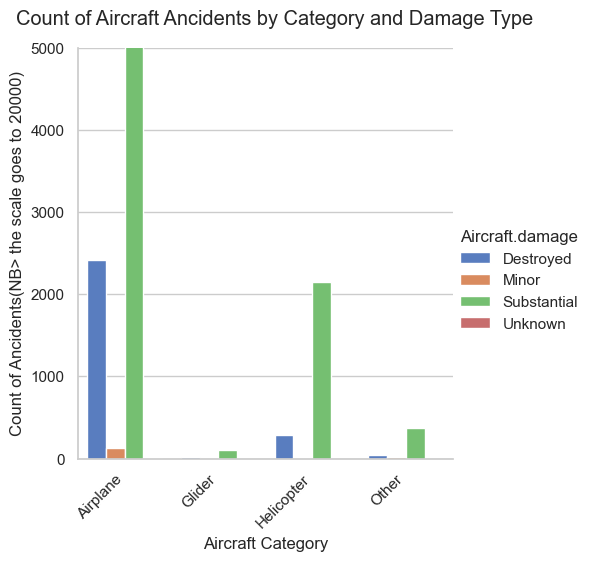

In [96]:
# first aggregate the data
agg_data = aviation_clean_ob1.groupby(['Aircraft.Category', 'Aircraft.damage']).size().reset_index(name='Count')
agg_data['Aircraft.Category'] = agg_data['Aircraft.Category'].apply(lambda x: x if x in ['Airplane', 'Helicopter', 'Glider'] else 'Other')
agg_data = agg_data.groupby(['Aircraft.Category', 'Aircraft.damage']).sum().reset_index()
# Set the style 
sns.set(style="whitegrid") 
# Create the plot
plt.figure(figsize=(14, 8));
aviation_clean_ob1_visual1= sns.catplot( x="Aircraft.Category", y="Count", hue="Aircraft.damage", kind="bar", data=agg_data, palette="muted" )
aviation_clean_ob1_visual1.set_xticklabels(rotation=45, ha='right')
# Rotate x-axis labels and align them
aviation_clean_ob1_visual1.set_axis_labels("Aircraft Category", "Count of Ancidents(NB> the scale goes to 20000)")
aviation_clean_ob1_visual1.fig.suptitle("Count of Aircraft Ancidents by Category and Damage Type", y=1.03)
# Expand the y-axis scale
aviation_clean_ob1_visual1.set(ylim=(0, 5000))
plt.show()



##### graph 2

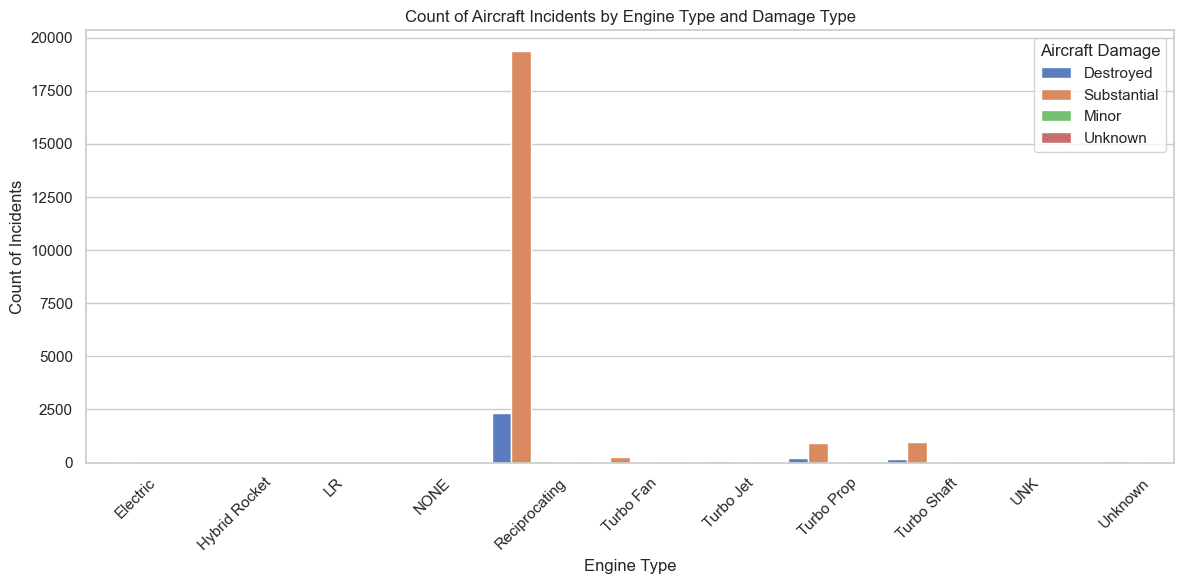

In [97]:
# Aggregate the data 
agg_data = aviation_clean_ob1.groupby(['Engine.Type', 'Aircraft.damage']).size().reset_index(name='Count')

# Set the style 
sns.set(style="whitegrid")

# Create the bar plot 
def create_plot():
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(
        x="Engine.Type", 
        y="Count", 
        hue="Aircraft.damage", 
        data=agg_data, 
        palette="muted"
    )
    plt.xlabel("Engine Type")
    plt.ylabel("Count of Incidents")
    plt.title("Count of Aircraft Incidents by Engine Type and Damage Type")
    plt.legend(title="Aircraft Damage")
    plt.xticks(rotation=45)  # Fixes the tick label warning
    return ax  # Return the axis object (optional)

# Generate and display the plot
aviation_clean_ob1_visual2 = create_plot()
plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.show()

#### Analysis:
#### 1.Aircraft Accidents by Category and Damage Type:Airplanes are the most prone to accidents, with substantial damage incidents reaching up to 20,000. This highlights a significant risk factor for airplane operations.
#### 2.Categories Less Prone to Accidents:Gliders, Balloons, Gyrocraft, Ultralight, Blimps, Powered-Lift, Weight-Shift, Powered Parachute, Rocket, WSFT, and ULTR are less prone to accidents. These categories show lower incident rates and may present safer investment options.
#### 3.Engine Type Risk:Aircraft with reciprocating engines are more prone to accidents. This finding underscores the importance of considering engine type in safety assessments and investment decisions.


### Objective 2. Best season

##### 1.This is a count plot showing Count of Aircraft Incidents by Season and Damage Type

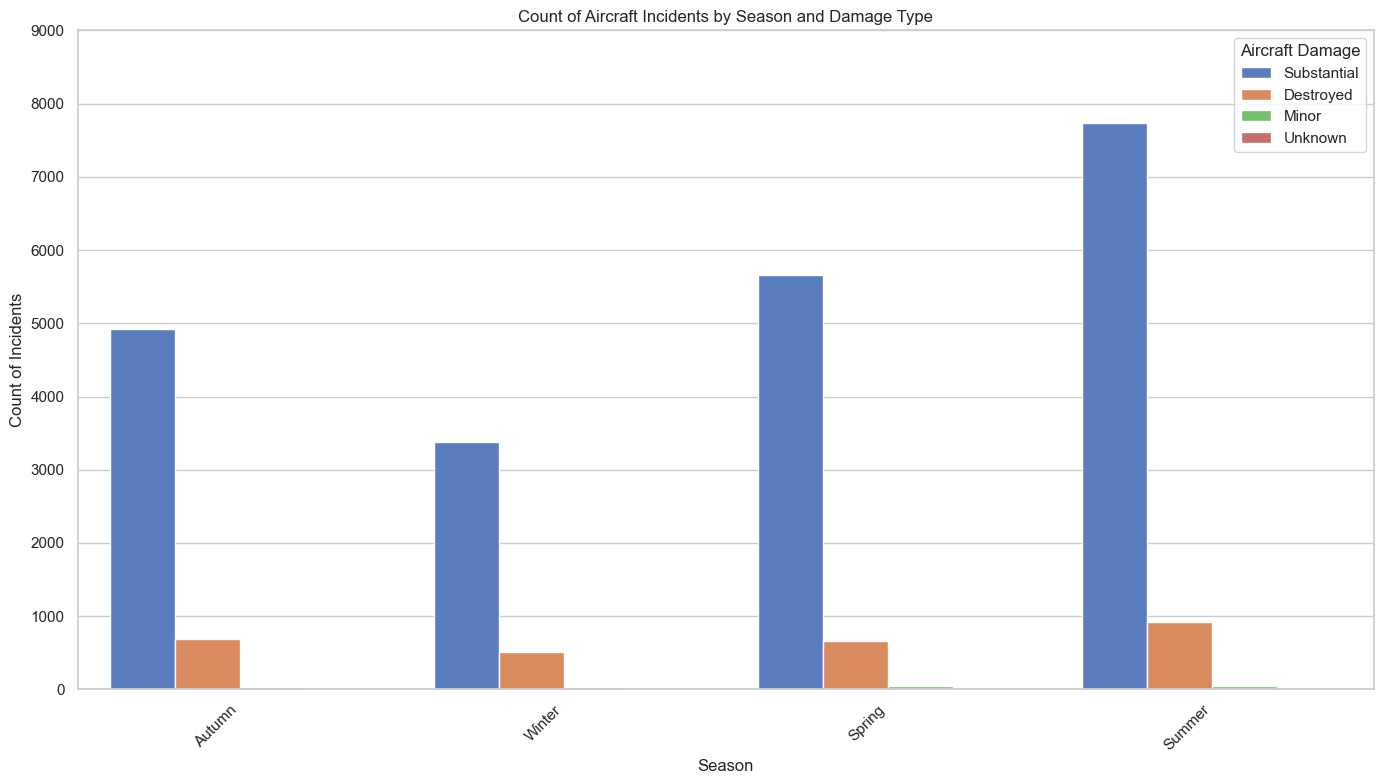

In [98]:
def create_plot():
    sns.set(style="whitegrid")
    plt.figure(figsize=(14, 8))
    ax = sns.countplot(x="Season", 
                      hue="Aircraft.damage", 
                      data=aviation_clean_ob2, 
                      palette="muted")
    
    # Set rotation and alignment using plt.xticks() instead
    plt.xticks(rotation=45, ha='right')
    
    plt.xlabel("Season")
    plt.ylabel("Count of Incidents")
    plt.title("Count of Aircraft Incidents by Season and Damage Type")
    plt.legend(title="Aircraft Damage")
    plt.ylim(0, 9000)
    return ax  # Return the axes object

# Create and show the plot
aviation_clean_ob2_visual = create_plot()
plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.show()

#### Analysis
#### 1.Aircraft Incidents by Season:The number of planes destroyed remains relatively constant across all seasons, indicating that certain types of damage are not heavily influenced by seasonal variations.
#### 2.Increased Risk in Summer:There is a notable increase in incidents during the summer, suggesting that flying conditions or operational factors in this season may contribute to a higher risk.
#### 3.Recommendation for Light Aircraft:For light aircraft operations, flying during autumn is advisable as it presents more favorable conditions. Autumn is the second-best performing season, offering a balance between operational efficiency and safety.
#### 4.Winter Operations for Panes:The lower incident rates during this time indicate more stable and predictable flying conditions.

### Objective 3. The best location?


##### 1.This is a Bar plot showing Count of Aircraft Incidents by Location and Damage Type

C:\Users\khali\AppData\Local\Temp\ipykernel_5420\1995355104.py:11: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



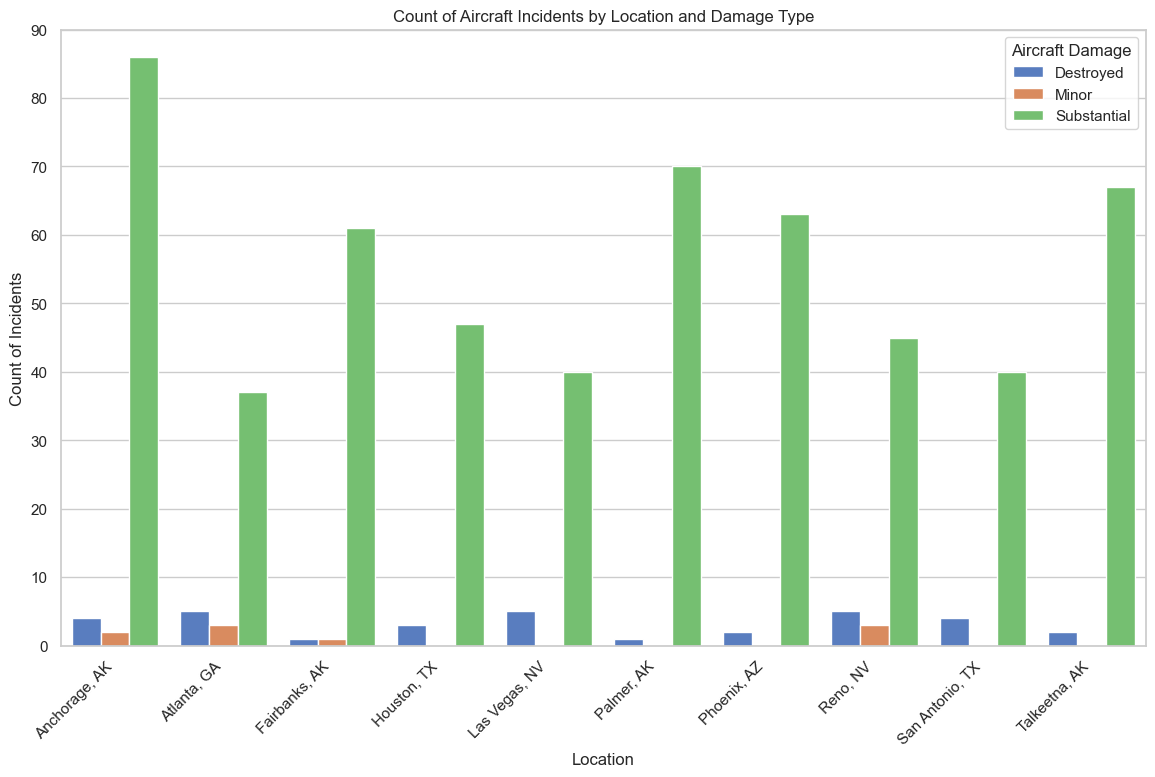

In [99]:
# Aggregate the data
agg_data = aviation_clean_ob3.groupby(['Location', 'Aircraft.damage']).size().reset_index(name='Count')

# Set the style
sns.set(style="whitegrid")

# Create the bar plot
def create_plot():
 plt.figure(figsize=(14, 8))
 aviation_clean_ob3_visual = sns.barplot(x="Location", y="Count", hue="Aircraft.damage", data=agg_data, palette="muted")
 aviation_clean_ob3_visual.set_xticklabels(aviation_clean_ob3_visual.get_xticklabels(), rotation=45, ha='right')
 plt.xlabel("Location")
 plt.ylabel("Count of Incidents")
 plt.title("Count of Aircraft Incidents by Location and Damage Type")
 plt.legend(title="Aircraft Damage")
 plt.ylim(0,90) 
# Create the plot and save to a variable
aviation_clean_ob3_visual = create_plot() 
plt.show()

#### Analysis
#### Based on the graph of Count of Aircraft Incidents by Location and Damage Type for the top 10 airports, I identified the top 3 locations with incident counts below 40:
#### Atlanta
#### Las Vegas
#### San Antonio

### Objective 4. Most risky phase of flight


##### This is a Heatmap showing Count of Aircraft Incidents by Broad.phase.of.flight and Damage Type

### Phase of Flight Risk

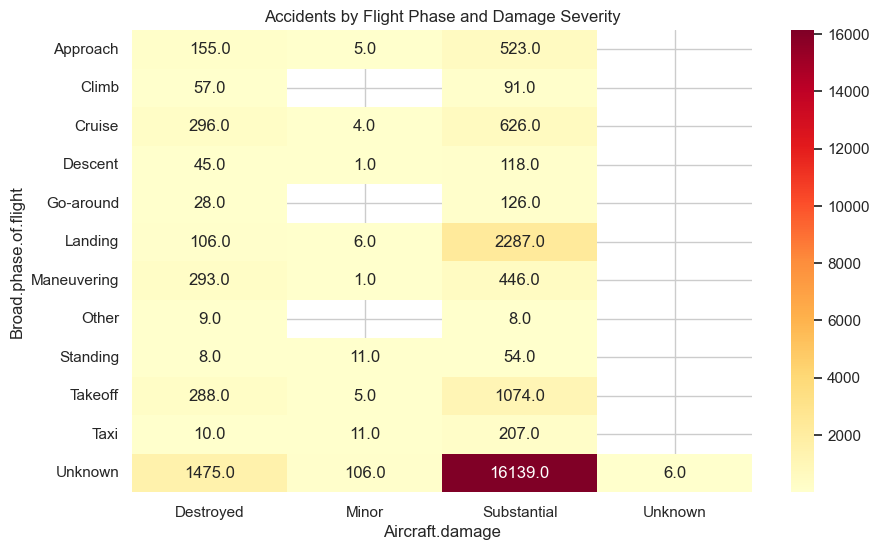

In [100]:
# Flight phase risk heatmap
phase_risk = aviation_clean_ob4.groupby(['Broad.phase.of.flight', 'Aircraft.damage']).size().unstack()
plt.figure(figsize=(10,6))
sns.heatmap(phase_risk, annot=True, fmt='', cmap='YlOrRd')
plt.title('Accidents by Flight Phase and Damage Severity')
plt.show()

#### Analysis 
#### 1.Risk Assessment by Flight Phase:Analysis of the graph showing Count of Aircraft Incidents by Broad Phase of Flight and Damage Type reveals that the landing and takeoff phases pose the highest risk
#### 2.High-Risk Phases:The data indicates that incidents are more frequent during the landing and takeoff phases compared to other phases of flight.

### Objective 5. Best weather condition for operation?


##### This is a Bar plot showing Count of Aircraft ancients Weather.Condition and Damage Type

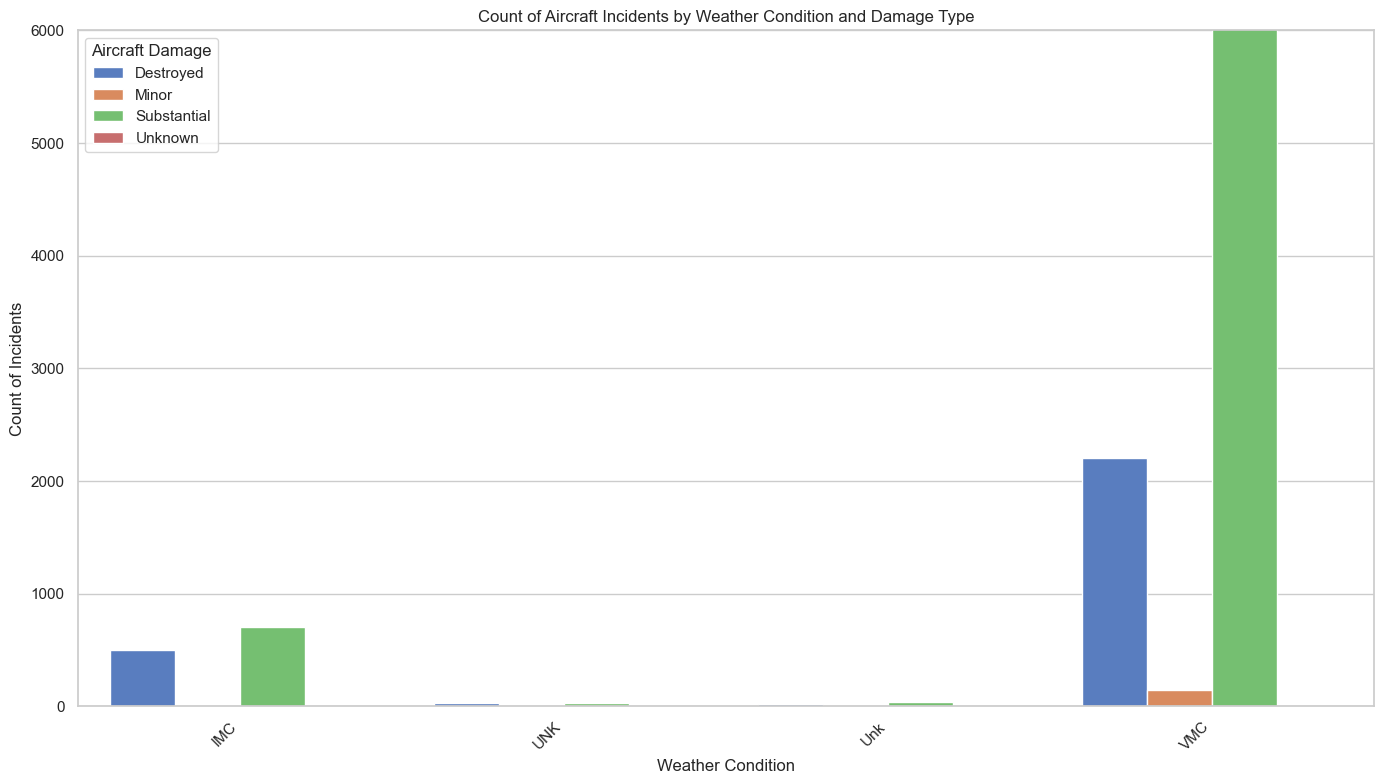

In [101]:
# Aggregate the data
agg_data = aviation_clean_ob5.groupby(['Weather.Condition', 'Aircraft.damage']).size().reset_index(name='Count')

# Set the style
sns.set(style="whitegrid")

# Create the bar plot
def create_plot():
    plt.figure(figsize=(14, 8))
    ax = sns.barplot(
        x="Weather.Condition", 
        y="Count", 
        hue="Aircraft.damage", 
        data=agg_data, 
        palette="muted"
    )
    
    # Proper way to rotate x-axis labels
    plt.xticks(rotation=45, ha='right')
    
    plt.xlabel("Weather Condition")  # Fixed label (removed dot)
    plt.ylabel("Count of Incidents")  # Fixed typo "ancidents" -> "Incidents"
    plt.title("Count of Aircraft Incidents by Weather Condition and Damage Type")  # Fixed typo and label
    plt.legend(title="Aircraft Damage")
    plt.ylim(0, 6000)
    plt.tight_layout()  # Adjust layout to prevent label cutoff
    return ax  # Return the axes object instead of undefined show_plot

# Create and show the plot
aviation_clean_ob5_visual = create_plot()
plt.show()

#### Analysis
#### 1.Weather Condition and Incident Analysis:The graph of Count of Aircraft Incidents by Weather Condition and Damage Type highlights that Visual Meteorological Conditions (VMC) are associated with the highest number of incidents. 

### Objective 6. Find which aircraft poses more risk to human life
##### for this we are gonna create 4 subplots with the aircraft categoy  aganist the injuries

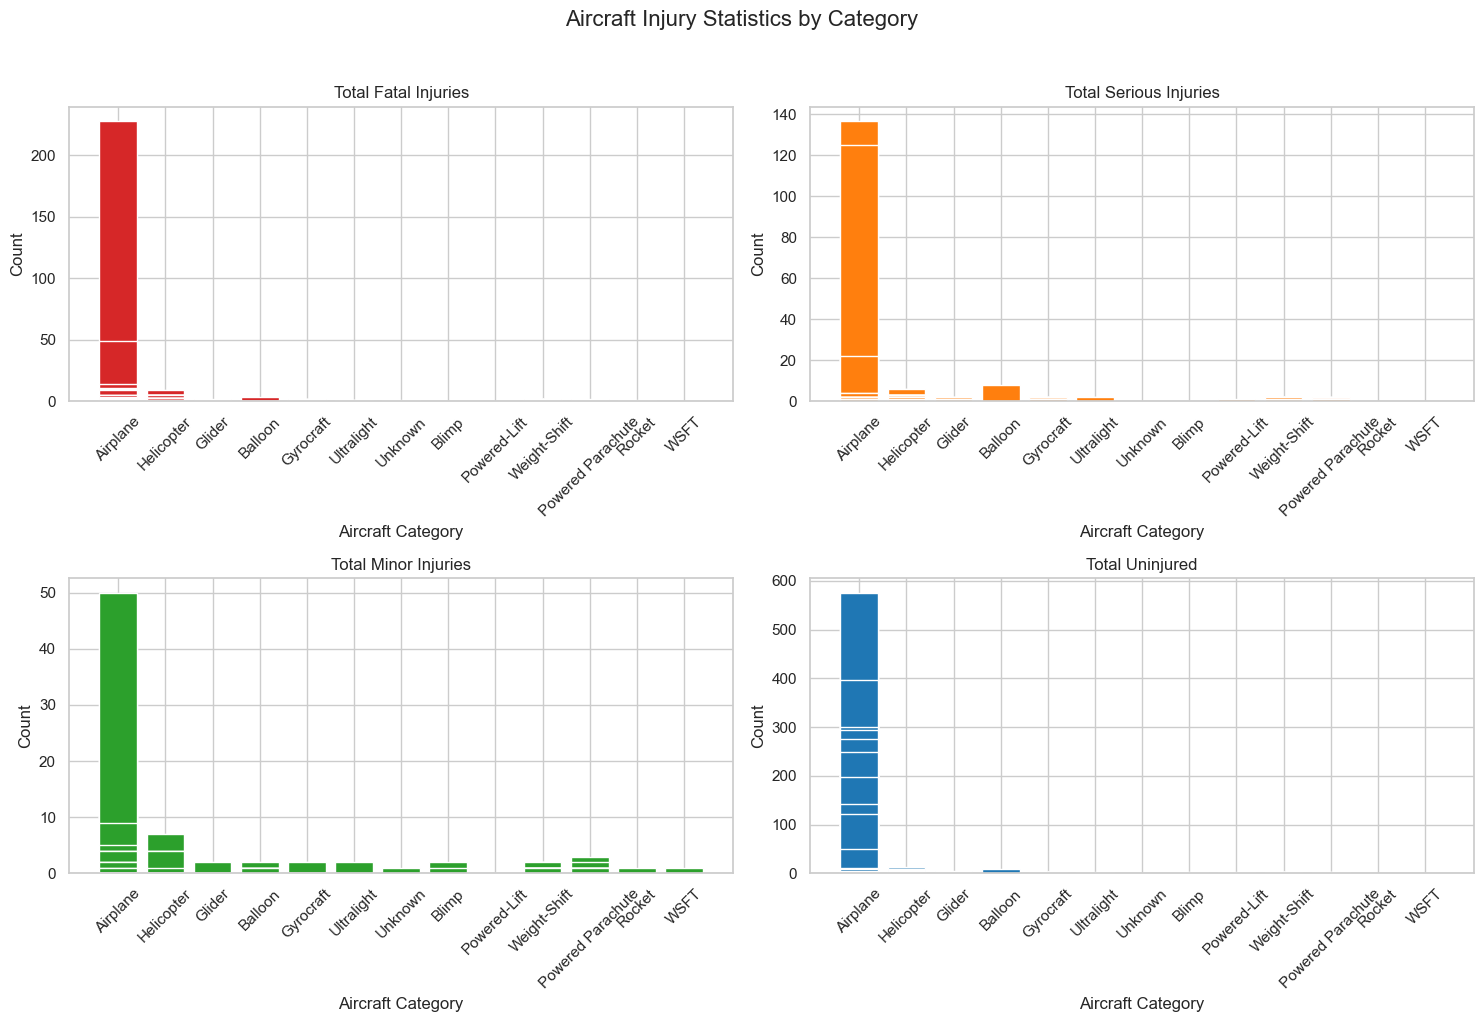

In [102]:
# Create the figure and subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Aircraft Injury Statistics by Category', fontsize=16, y=1.02)

# Plot for Total Fatal Injuries
axs[0, 0].bar(aviation_clean_ob6['Aircraft.Category'], aviation_clean_ob6['Total.Fatal.Injuries'], color='#d62728')
axs[0, 0].set_title('Total Fatal Injuries')
axs[0, 0].set_xlabel('Aircraft Category')
axs[0, 0].set_ylabel('Count')
axs[0, 0].tick_params(axis='x', rotation=45)

# Plot for Total Serious Injuries
axs[0, 1].bar(aviation_clean_ob6['Aircraft.Category'], aviation_clean_ob6['Total.Serious.Injuries'], color='#ff7f0e')
axs[0, 1].set_title('Total Serious Injuries')
axs[0, 1].set_xlabel('Aircraft Category')
axs[0, 1].set_ylabel('Count')
axs[0, 1].tick_params(axis='x', rotation=45)

# Plot for Total Minor Injuries
axs[1, 0].bar(aviation_clean_ob6['Aircraft.Category'], aviation_clean_ob6['Total.Minor.Injuries'], color='#2ca02c')
axs[1, 0].set_title('Total Minor Injuries')
axs[1, 0].set_xlabel('Aircraft Category')
axs[1, 0].set_ylabel('Count')
axs[1, 0].tick_params(axis='x', rotation=45)

# Plot for Total Uninjured
axs[1, 1].bar(aviation_clean_ob6['Aircraft.Category'], aviation_clean_ob6['Total.Uninjured'], color='#1f77b4')
axs[1, 1].set_title('Total Uninjured')
axs[1, 1].set_xlabel('Aircraft Category')
axs[1, 1].set_ylabel('Count')
axs[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

#### analysis
#### 1.Injury and Safety Comparison:The analysis of the graphs reveals that airplanes have the highest number of injured people. However, they also account for the highest number of uninjured individuals. This duality indicates that while airplanes are involved in more incidents, a significant proportion of these incidents result in no injuries.
#### 2.Profitability vs. Risk:Given the data, airplanes appear to be the most lucrative aircraft type. They offer substantial potential for profitability but also come with a considerable amount of risk due to the high number of incidents.
#### 3.Based on the overall analysis, it is advisable for the company to start with lightweight aircraft. These aircraft types pose lower risks and provide a safer entry point into the market. Over time, as the company gains more experience and establishes a strong operational foundation, it can progressively expand into larger, more lucrative aircraft like airplanes.

### Phase 4. Solid Business recommendations

### After analyzing the data here are the recommendations i came up with
#### 1.Initial Focus on Lightweight Crafts:Start operations with lightweight aircraft such as gliders, ultralights, and powered parachutes. These have shown lower incident rates, offering a safer entry into the market.
#### 2.Gradual Expansion:Once the company has established safe and efficient operations with lightweight crafts, it can gradually expand to larger aircraft. This phased approach will allow the company to build up expertise and manage risks effectively.
#### 3.Continual Risk Assessment:Implement ongoing monitoring and risk assessment strategies to identify and mitigate potential hazards. This will help maintain high safety standards and support informed decision-making.
#### 4.Training and Safety Protocols:Invest in comprehensive training programs for pilots and crew, focusing on the unique challenges associated with different aircraft types and phases of flight.
#### 5.Future Plane Investments:If the company decides to invest in planes in the future, it should avoid those with reciprocating engines due to their higher accident rates. Opting for aircraft with safer engine types will mitigate risks.
#### 6.Optimal Seasonal Operations:Light Aircraft: Focus operations in autumn for reduced risk and favorable conditions.>Planes: Prioritize winter operations for enhanced safety and minimized risk of incidents.
#### 7.Seasonal Risk Management:Implement stricter safety protocols and monitoring during summer months to mitigate the increased risk of incidents.
#### 8.I recommend the company consider these locations(Atlanta,Las Vegas,San Antonio) for their startups due to their relatively low incident rates. These locations provide a safer operational environment, which is crucial for a new venture aiming to minimize risks and ensure smooth operations.By strategically choosing locations with lower incident rates, the company can focus on establishing a robust operational foundation while maintaining a high standard of safety.
#### 9.Airport Path Condition:Conduct thorough and regular assessments of airport runways and taxiways to ensure they are in optimal condition. This includes checking for any potential hazards, ensuring proper maintenance, and implementing safety measures.
#### 9.Skilled Pilot Recruitment:Prioritize the recruitment and training of pilots who have proven expertise in handling takeoff and landing maneuvers. Implement advanced training programs and continuous skill enhancement sessions to keep pilots well-prepared for these critical phases.
#### 10.Enhanced Safety Protocols:Develop and enforce stringent safety protocols specifically designed for the takeoff and landing phases. This could include procedural checklists, advanced simulation training, and real-time monitoring systems to detect and respond to potential issues quickly.
#### 11.Avoid VMC for Lightweight Aircraft:Strategically plan flight operations to avoid VMC, especially when operating lightweight crafts. Consider alternative weather conditions that provide a safer flying environment.
#### 12.Training and Preparedness:Ensure that pilots and crew are well-trained to handle various weather conditions. Special emphasis should be placed on managing flights in non-VMC conditions to enhance overall safety.
### By following these recommendations, the company can optimize its operational strategy, balancing profitability with safety, and ensuring sustainable growth over time.